<a href="https://colab.research.google.com/github/RafaellaB/Qualidade_do_ar_SP/blob/main/qualidade_do_ar_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonte: Plataforma Qualidade do Ar, do Instituto de Energia e Meio Ambiente (IEMA);
Site: https://energiaeambiente.org.br/qualidadedoar#secao-14.

In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [15]:
import pandas as pd
from datetime import datetime, time
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from datetime import datetime
import time as tm

In [3]:
from google.colab import files
uploaded = files.upload()

Saving SP201501.csv to SP201501.csv


In [151]:
dataframe = pd.read_csv('SP201501.csv', encoding='ISO-8859-1') #ler os dados

In [152]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687848 entries, 0 to 687847
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Data      687848 non-null  object 
 1   Hora      687848 non-null  object 
 2   Estacao   687848 non-null  object 
 3   Codigo    687848 non-null  object 
 4   Poluente  687848 non-null  object 
 5   Valor     687848 non-null  float64
 6   Unidade   687848 non-null  object 
 7   Tipo      687848 non-null  object 
dtypes: float64(1), object(7)
memory usage: 42.0+ MB


In [153]:
dataframe.head()

,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica
1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica
2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica
3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica
4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica


### Informações sobre o dataset

In [154]:
# Converter a coluna 'data' para o tipo datetime
dataframe['Data'] = pd.to_datetime(dataframe['Data'])


In [155]:
from datetime import datetime

In [115]:
# Transformando string de hora para datatime
#dataframe['Hora'] = dataframe['Hora'].replace('24:00', '00:00')
#dataframe['Hora'] = pd.to_datetime(dataframe['Hora'], format='%H:%M')

In [156]:
dataframe.info()  # verificar o tipo de cada dado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687848 entries, 0 to 687847
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Data      687848 non-null  datetime64[ns]
 1   Hora      687848 non-null  object        
 2   Estacao   687848 non-null  object        
 3   Codigo    687848 non-null  object        
 4   Poluente  687848 non-null  object        
 5   Valor     687848 non-null  float64       
 6   Unidade   687848 non-null  object        
 7   Tipo      687848 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 42.0+ MB


In [47]:
dataframe.shape[1] #número de colunas

8

In [118]:
dataframe.shape[0] #número de linhas

687848

In [119]:
dataframe.columns #retorna as variáveis do dataset

Index(['Data', 'Hora', 'Estacao', 'Codigo', 'Poluente', 'Valor', 'Unidade',
       'Tipo'],
      dtype='object')

### Filtros e seleções

In [157]:
dataframe.head(5) #retorna só as 5 primeiras linhas

,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica
1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica
2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica
3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica
4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica


In [158]:
display(dataframe) # 5 primeiras e 5 últimas linhas do dataset com total de linhas e colunas.

,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica
1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica
2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica
3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica
4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica
...,...,...,...,...,...,...,...,...
687843,2015-01-03,03:00,Marg. Tietê - Pte dos Remédios,SP37,NO2,24.0,ug/m3,automatica
687844,2015-01-03,04:00,Marg. Tietê - Pte dos Remédios,SP37,NO2,20.0,ug/m3,automatica
687845,2015-01-03,05:00,Marg. Tietê - Pte dos Remédios,SP37,NO2,19.0,ug/m3,automatica
687846,2015-01-03,06:00,Marg. Tietê - Pte dos Remédios,SP37,NO2,19.0,ug/m3,automatica


In [159]:
dataframe.loc[3] #retorna as informações da linha 3

Data                 2015-01-01 00:00:00
Hora                               04:00
Estacao     Americana - Vila Santa Maria
Codigo                              SP01
Poluente                            MP10
Valor                               53.0
Unidade                            ug/m3
Tipo                          automatica
Name: 3, dtype: object

In [163]:
print(dataframe.nunique()) #retorna o número de valores únicos de cada variável


Data        365
Hora         24
Estacao      28
Codigo       28
Poluente      6
Valor       474
Unidade       1
Tipo          1
dtype: int64


In [169]:
# Valores únicos da variável Poluente:
valores_unicos = dataframe['Poluente'].unique()
print(valores_unicos)

['MP10' 'O3' 'NO2' 'CO' 'MP2.5' 'SO2']


In [173]:
dataframe[dataframe['Valor'] > 100] #filtragem para valores acima de 100

,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
285,2015-01-12,22:00,Americana - Vila Santa Maria,SP01,MP10,106.0,ug/m3,automatica
468,2015-01-20,13:00,Americana - Vila Santa Maria,SP01,MP10,107.0,ug/m3,automatica
482,2015-01-21,03:00,Americana - Vila Santa Maria,SP01,MP10,108.0,ug/m3,automatica
1585,2015-05-26,09:00,Americana - Vila Santa Maria,SP01,MP10,104.0,ug/m3,automatica
1694,2015-05-30,23:00,Americana - Vila Santa Maria,SP01,MP10,143.0,ug/m3,automatica
...,...,...,...,...,...,...,...,...
678505,2015-11-11,08:00,Marg. Tietê - Pte dos Remédios,SP37,MP10,102.0,ug/m3,automatica
678506,2015-11-11,09:00,Marg. Tietê - Pte dos Remédios,SP37,MP10,108.0,ug/m3,automatica
678507,2015-11-11,10:00,Marg. Tietê - Pte dos Remédios,SP37,MP10,107.0,ug/m3,automatica
684483,2015-08-08,03:00,Marg. Tietê - Pte dos Remédios,SP37,MP2.5,105.0,ug/m3,automatica


In [174]:
# Supondo que 'dataframe' é o seu DataFrame
df = dataframe.drop_duplicates()

# Exibir o novo DataFrame sem duplicatas
print(df)

             Data   Hora                         Estacao Codigo Poluente  \
0      2015-01-01  01:00    Americana - Vila Santa Maria   SP01     MP10   
1      2015-01-01  02:00    Americana - Vila Santa Maria   SP01     MP10   
2      2015-01-01  03:00    Americana - Vila Santa Maria   SP01     MP10   
3      2015-01-01  04:00    Americana - Vila Santa Maria   SP01     MP10   
4      2015-01-01  05:00    Americana - Vila Santa Maria   SP01     MP10   
...           ...    ...                             ...    ...      ...   
687843 2015-01-03  03:00  Marg. Tietê - Pte dos Remédios   SP37      NO2   
687844 2015-01-03  04:00  Marg. Tietê - Pte dos Remédios   SP37      NO2   
687845 2015-01-03  05:00  Marg. Tietê - Pte dos Remédios   SP37      NO2   
687846 2015-01-03  06:00  Marg. Tietê - Pte dos Remédios   SP37      NO2   
687847 2015-01-03  07:00  Marg. Tietê - Pte dos Remédios   SP37      NO2   

        Valor Unidade        Tipo  
0        65.0   ug/m3  automatica  
1        98.0  

In [175]:
import pandas as pd
import numpy as np

# Substitua os valores ausentes por NaN
df = df.fillna(np.nan)


## Estatística descritiva

In [ ]:
print(dataframe.describe())


               Valor
count  687848.000000
mean      107.932830
std       294.854101
min         0.000000
25%        12.000000
50%        26.000000
75%        51.000000
max      9645.000000


In [177]:
df.Poluente.value_counts() #contagem de valores únicos da variável poluente

MP10     189149
O3       175636
NO2      154537
CO        65539
MP2.5     53579
SO2       49408
Name: Poluente, dtype: int64

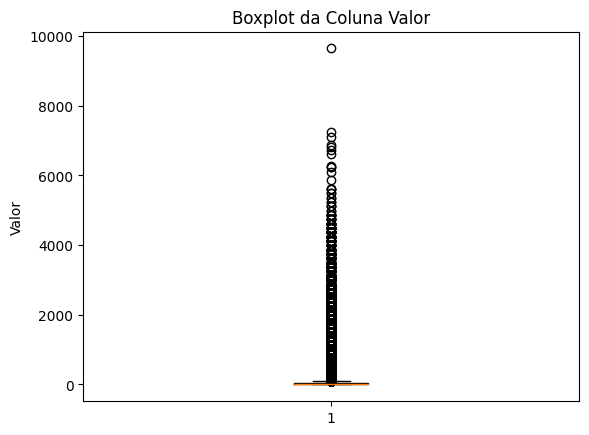

In [176]:
# Exemplo de boxplot
plt.boxplot(df['Valor'])
plt.title('Boxplot da Coluna Valor')
plt.ylabel('Valor')
plt.show()

In [ ]:
x = (dataframe['Data']) # Variável independente
y = (dataframe['Valor']) # Variável dependente


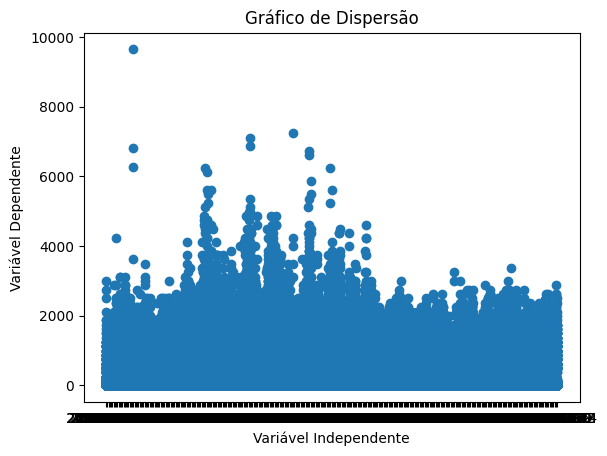

In [ ]:
# Criar o gráfico de dispersão
plt.scatter(x, y)
# Adicionar rótulos e título
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.title('Gráfico de Dispersão')

# Exibir o gráfico
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Calcule a porcentagem de dados ausentes por coluna
missing_data_percentage = (dataframe.isnull().sum() / len(dataframe)) * 100

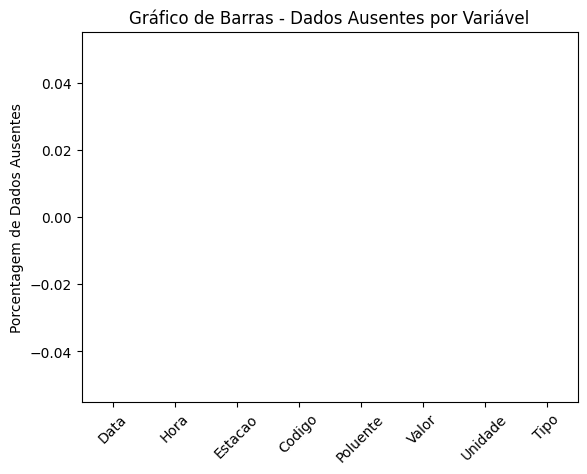

In [ ]:
# Crie um gráfico de barras para os dados ausentes
missing_data_percentage.plot(kind='bar')
plt.ylabel('Porcentagem de Dados Ausentes')
plt.title('Gráfico de Barras - Dados Ausentes por Variável')
plt.xticks(rotation=45)
plt.show()

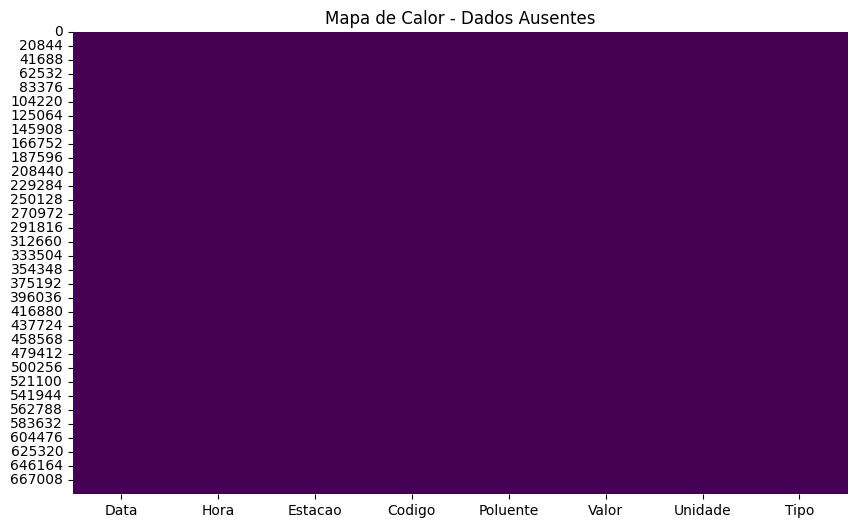

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crie um mapa de calor dos dados ausentes
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(dataframe.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de Calor - Dados Ausentes')
plt.show()


In [ ]:
dataframe['Valor'] = dataframe['Data'].fillna(np.nan)